In [40]:
#!mongoimport --type csv -d Project_3 -c video_game_sales --drop --jsonArray /Data/SQL Video_Game_Sales.csv
#!mongoimport --type csv -d Project_3 -c video_games --drop --jsonArray /Data/SQL video_games_rating.csv


In [41]:
import pymongo
from pymongo import MongoClient
import pandas as pd
from pprint import pprint 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
mongo = MongoClient(port=27017)

In [43]:
print(mongo.list_database_names())

['Homework1', 'Project_3', 'admin', 'classDB', 'config', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [44]:
db = mongo['Project_3']

In [45]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [46]:
video_games = db['video_games']

In [47]:
pprint(db.video_games.find_one())

{'_id': ObjectId('6584da747aadc9acb05e6192'),
 'name': 'The Legend of Zelda: Ocarina of Time',
 'platform': ' Nintendo 64',
 'release_date': '23-Nov-98',
 'summary': 'As a young boy, Link is tricked by Ganondorf, the King of the '
            'Gerudo Thieves. The evil human uses Link to gain access to the '
            'Sacred Realm, where he places his tainted hands on Triforce and '
            'transforms the beautiful Hyrulean landscape into a barren '
            'wasteland. Link is determined to fix the problems he helped to '
            'create, so with the help of Rauru he travels through time '
            'gathering the powers of the Seven Sages.',
 'user_review': 9.1}


In [48]:
count_tbd = video_games.count_documents({'user_review': 'tbd'})

print(f"Number of documents where user_review is 'tbd': {count_tbd}")

Number of documents where user_review is 'tbd': 0


In [49]:
# Delete documents with user_review equal to "tbd"
result = video_games.delete_many({'user_review': 'tbd'})
print(f"{result.deleted_count} documents with user review 'tbd' have been deleted.")
# Now, retrieve the remaining documents and perform aggregation
pipeline = [
    {
        '$group': {
            '_id': '$name',
            'mean_user_review': {'$avg': '$user_review'}
        }
    }
]

result_after_deletion = list(video_games.aggregate(pipeline))

for item in result_after_deletion[:5]:
    pprint(item)

0 documents with user review 'tbd' have been deleted.
{'_id': 'Saints Row IV: Re-Elected', 'mean_user_review': 7.2}
{'_id': 'Skylanders Swap Force', 'mean_user_review': 5.86}
{'_id': 'Mercenaries', 'mean_user_review': 8.75}
{'_id': 'Dynasty Warriors 3', 'mean_user_review': 8.8}
{'_id': 'City Life 2008 Edition', 'mean_user_review': 7.6}


In [50]:
documents_with_tbd = video_games.find({'user_review': 'tbd'})

# Print or process the matching documents
for document in documents_with_tbd:
    print(document)

In [51]:
cleaned_df = pd.DataFrame(result_after_deletion)
cleaned_df.head(15)

,_id,mean_user_review
0,Saints Row IV: Re-Elected,7.20
1,Skylanders Swap Force,5.86
2,Mercenaries,8.75
3,Dynasty Warriors 3,8.80
4,City Life 2008 Edition,7.60
5,Football Manager 2018,6.00
6,True Swing Golf,7.70
7,Thunderstrike: Operation Phoenix,8.20
8,San Francisco Rush 2049,8.60
9,The Evil Within: The Executioner,6.40


In [52]:
cleaned_df['mean_user_review'] = cleaned_df['mean_user_review'].round(2)
cleaned_df = cleaned_df.rename(columns={'_id': 'Video Game'})
cleaned_df = cleaned_df.rename(columns={'mean_user_review': 'Average Rating'})

cleaned_df.head(15)

,Video Game,Average Rating
0,Saints Row IV: Re-Elected,7.20
1,Skylanders Swap Force,5.86
2,Mercenaries,8.75
3,Dynasty Warriors 3,8.80
4,City Life 2008 Edition,7.60
5,Football Manager 2018,6.00
6,True Swing Golf,7.70
7,Thunderstrike: Operation Phoenix,8.20
8,San Francisco Rush 2049,8.60
9,The Evil Within: The Executioner,6.40


In [53]:
top_games = cleaned_df.sort_values(by='Average Rating', ascending=False)
top_games.head(15)

,Video Game,Average Rating
1237,GrimGrimoire,9.70
6513,Ghost Trick: Phantom Detective,9.70
7632,Tengami,9.70
4762,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.70
3361,Metal Torrent,9.70
11166,Crystar,9.60
2217,Diaries of a Spaceport Janitor,9.60
5479,Astro's Playroom,9.30
6904,The Witcher 3: Wild Hunt,9.27
8978,Metal Gear Solid 3: Snake Eater,9.20


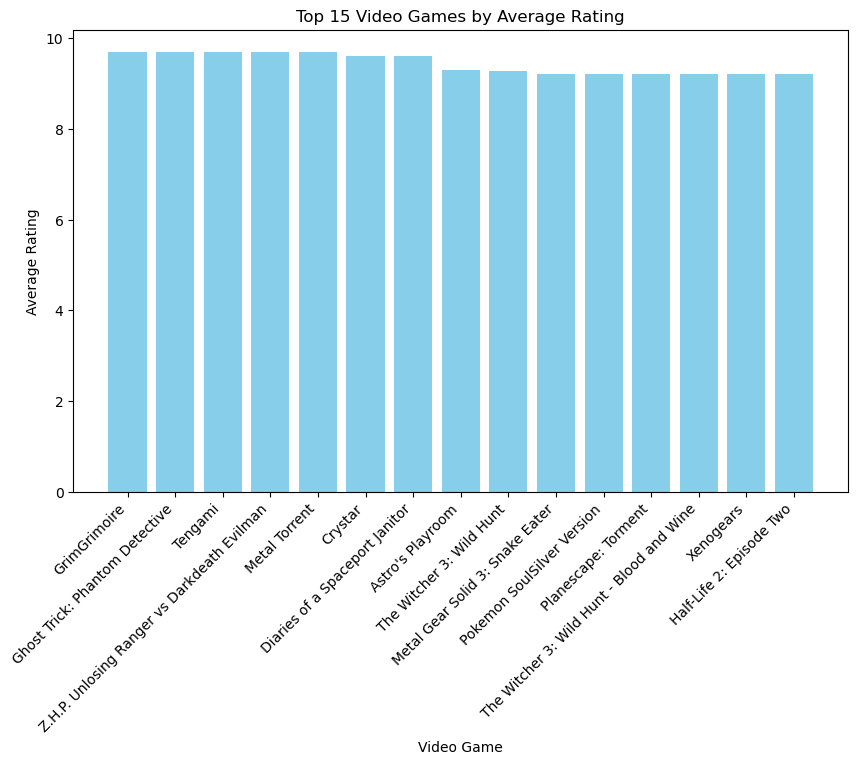

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(top_games['Video Game'].head(15), top_games['Average Rating'].head(15), color='skyblue')
plt.xlabel('Video Game')
plt.ylabel('Average Rating')
plt.title('Top 15 Video Games by Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a JPEG image
plt.savefig('Charts/top_games_chart.jpg', format='jpeg', bbox_inches='tight')

In [59]:
bottom_games = cleaned_df.sort_values(by='Average Rating', ascending=True)
bottom_games.head(15)

,Video Game,Average Rating
7624,Madden NFL 21,0.35
4622,Madden NFL 22,0.55
5673,Warcraft III: Reforged,0.60
8318,FIFA 20: Legacy Edition,0.70
1849,When Ski Lifts Go Wrong,1.00
6858,The Sims 4: Star Wars - Journey to Batuu,1.00
4827,FIFA 21,1.07
4490,Call of Duty: Modern Warfare 3 - Defiance,1.20
1784,Fast & Furious: Showdown,1.30
9223,FIFA 20,1.30


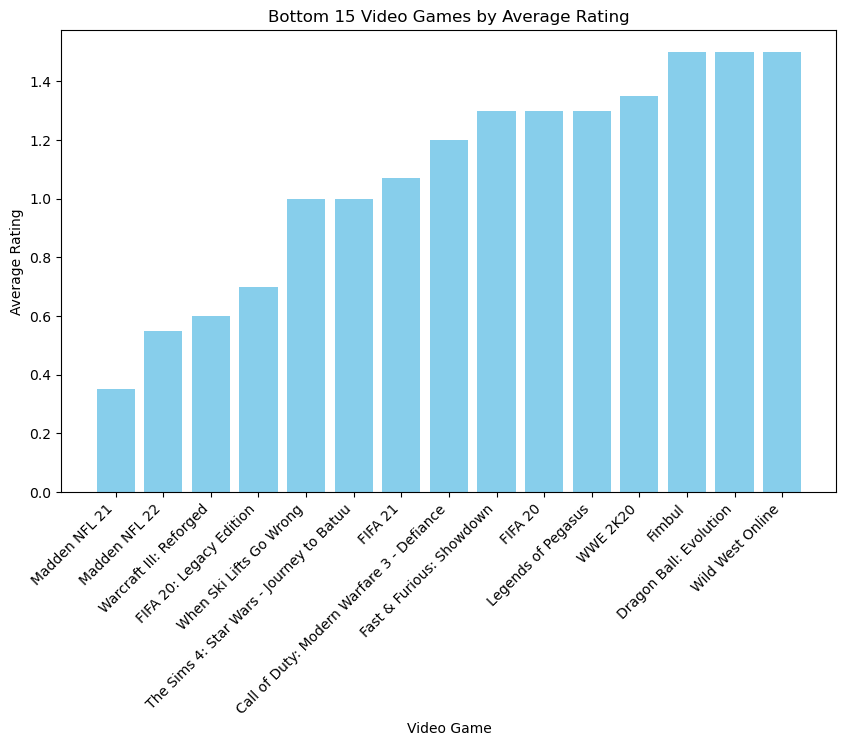

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_games['Video Game'].head(15), bottom_games['Average Rating'].head(15), color='skyblue')
plt.xlabel('Video Game')
plt.ylabel('Average Rating')
plt.title('Bottom 15 Video Games by Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a JPEG image
plt.savefig('Charts/bottom_games.jpg', format='jpeg', bbox_inches='tight')

In [16]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [17]:
video_game_sales = db['video_game_sales']

In [18]:
pprint(db.video_game_sales.find_one())

{'EU_Sales': 29.02,
 'Genre': 'Sports',
 'Global_Sales': 82.74,
 'JP_Sales': 3.77,
 'NA_Sales': 41.49,
 'Name': 'Wii Sports',
 'Other_Sales': 8.46,
 'Platform': 'Wii',
 'Publisher': 'Nintendo',
 'Rank': 1,
 'Year': 2006,
 '_id': ObjectId('6584da927aadc9acb05eab02')}


In [19]:
result2 = video_game_sales.delete_many({'Year': 'N/A'})
print(f"{result2.deleted_count} documents with year 'N/A' have been deleted.")
pipeline = [
    {
        '$group': {
            '_id': '$Name',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

global_sales = list(video_game_sales.aggregate(pipeline))

for item in global_sales[:5]:
    pprint(item)

271 documents with year 'N/A' have been deleted.
{'Total Global Sales': 1.9500000000000002, '_id': 'Dynasty Warriors 3'}
{'Total Global Sales': 0.06, '_id': 'Hi Hi Puffy AmiYumi: Kaznapped'}
{'Total Global Sales': 0.02, '_id': 'Escape the Emerald Star'}
{'Total Global Sales': 0.16, '_id': 'True Swing Golf'}
{'Total Global Sales': 0.15, '_id': 'Farm Frenzy: Animal Country'}


In [20]:
global_df = pd.DataFrame(global_sales)
cleaned_sales_df = global_df.rename(columns={'_id': 'Video Game'})
top_sales = cleaned_sales_df.sort_values(by='Total Global Sales', ascending=False)
top_sales.head(15)

,Video Game,Total Global Sales
7622,Wii Sports,82.74
2448,Grand Theft Auto V,55.92
1334,Super Mario Bros.,45.31
11155,Tetris,35.84
9429,Mario Kart Wii,35.82
4663,Wii Sports Resort,33.00
3665,Pokemon Red/Pokemon Blue,31.37
5669,Call of Duty: Modern Warfare 3,30.83
7825,New Super Mario Bros.,30.01
3054,Call of Duty: Black Ops II,29.72


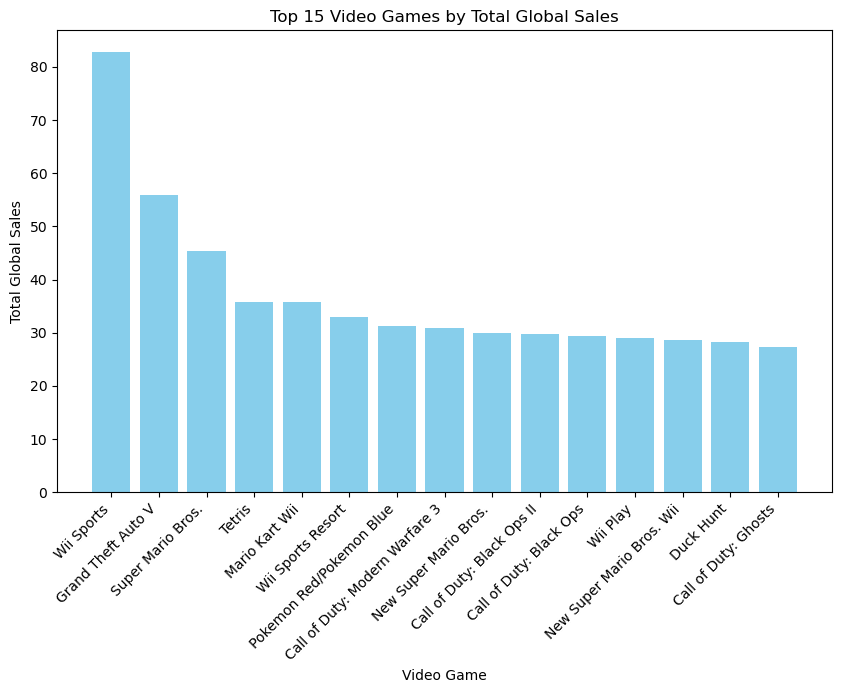

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(top_sales['Video Game'].head(15), top_sales['Total Global Sales'].head(15), color='skyblue')
plt.xlabel('Video Game')
plt.ylabel('Total Global Sales')
plt.title('Top 15 Video Games by Total Global Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a JPEG image
plt.savefig('Charts/top_sales.jpg', format='jpeg', bbox_inches='tight')

In [21]:
pipeline2 = [
    {
        '$group': {
            '_id': '$Genre',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

per_category = list(video_game_sales.aggregate(pipeline2))

for item in per_category[:5]:
    pprint(item)

{'Total Global Sales': 1026.2, '_id': 'Shooter'}
{'Total Global Sales': 1722.88, '_id': 'Action'}
{'Total Global Sales': 726.77, '_id': 'Racing'}
{'Total Global Sales': 1309.24, '_id': 'Sports'}
{'Total Global Sales': 829.15, '_id': 'Platform'}


In [62]:
global_df_per_catergory = pd.DataFrame(per_category)
cleaned_sales_df_category = global_df_per_catergory.rename(columns={'_id': 'Genre'})
top_sales_per_category = cleaned_sales_df_category.sort_values(by='Total Global Sales', ascending=False)
top_sales_per_category.head(15)

,Genre,Total Global Sales
6,Action,1722.88
11,Sports,1309.24
4,Shooter,1026.20
9,Role-Playing,923.84
0,Platform,829.15
2,Misc,797.62
1,Racing,726.77
7,Fighting,444.05
5,Simulation,390.16
3,Puzzle,242.22


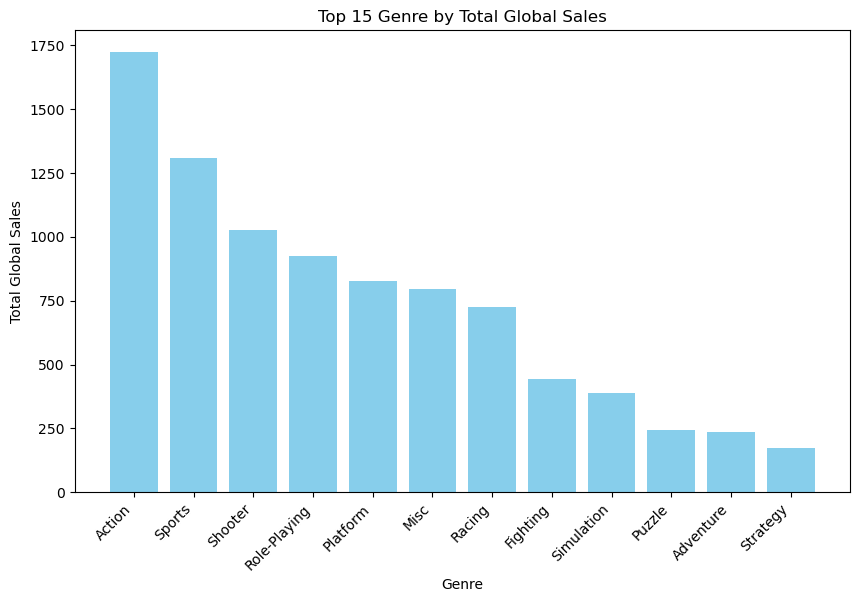

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(top_sales_per_category['Genre'].head(15), top_sales_per_category['Total Global Sales'].head(15), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.title('Top 15 Genre by Total Global Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a JPEG image
plt.savefig('Charts/top_sales_per_category.jpg', format='jpeg', bbox_inches='tight')

In [65]:
pipeline3 = [
    {
        '$group': {
            '_id': '$Platform',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

per_platform = list(video_game_sales.aggregate(pipeline3))

for item in per_platform[:5]:
    pprint(item)

{'Total Global Sales': 818.96, '_id': 'DS'}
{'Total Global Sales': 218.21, '_id': 'N64'}
{'Total Global Sales': 200.05, '_id': 'SNES'}
{'Total Global Sales': 255.05, '_id': 'PC'}
{'Total Global Sales': 313.56, '_id': 'GBA'}


In [66]:
global_df_per_platform = pd.DataFrame(per_platform)
cleaned_sales_df_platform = global_df_per_platform.rename(columns={'_id': 'Platform'})
top_sales_per_platform = cleaned_sales_df_platform.sort_values(by='Total Global Sales', ascending=False)
top_sales_per_platform.head(15)

,Platform,Total Global Sales
20,PS2,1233.46
11,X360,969.61
7,PS3,949.35
18,Wii,909.81
0,DS,818.96
21,PS,727.39
4,GBA,313.56
8,PSP,291.71
25,PS4,278.10
3,PC,255.05


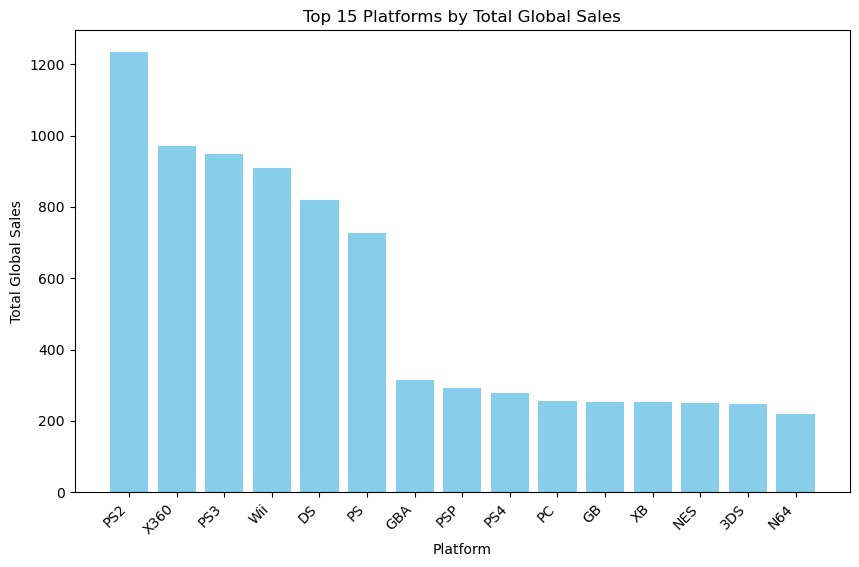

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(top_sales_per_platform['Platform'].head(15), top_sales_per_platform['Total Global Sales'].head(15), color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales')
plt.title('Top 15 Platforms by Total Global Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a JPEG image
plt.savefig('Charts/top_sales_per_platform.jpg', format='jpeg', bbox_inches='tight')

In [68]:
# Find the document with the maximum date
most_recent_document = video_game_sales.find_one(sort=[("Year", pymongo.DESCENDING)])

# Extract the most recent date from the document
most_recent_date = most_recent_document["Year"]

print("Most Recent Date:", most_recent_date)


Most Recent Date: 2020


In [69]:
merged_df = pd.merge(cleaned_df, cleaned_sales_df, on='Video Game')
# Print the merged DataFrame
merged_df.head(15)

,Video Game,Average Rating,Total Global Sales
0,Dynasty Warriors 3,8.80,1.95
1,True Swing Golf,7.70,0.16
2,Thunderstrike: Operation Phoenix,8.20,0.34
3,San Francisco Rush 2049,8.60,0.20
4,Rengoku: The Tower of Purgatory,6.10,0.11
5,Disney Art Academy,7.10,0.09
6,Dead Space 2,8.50,3.29
7,NHL 17,5.00,0.35
8,Need for Speed: Most Wanted 5-1-0,7.60,2.10
9,Destroy All Humans!,7.88,1.40


In [70]:
top_rating_merged = merged_df.sort_values(by='Average Rating', ascending=False)
top_rating_merged.head(15)

,Video Game,Average Rating,Total Global Sales
2465,Ghost Trick: Phantom Detective,9.70,0.42
481,GrimGrimoire,9.70,0.05
2614,The Witcher 3: Wild Hunt,9.27,5.64
3618,Warcraft III: Reign of Chaos,9.20,0.13
1867,Deus Ex,9.20,0.01
1352,Suikoden II,9.20,0.68
2321,Xenogears,9.20,1.46
3400,Metal Gear Solid 3: Snake Eater,9.20,4.23
708,Warcraft III: The Frozen Throne,9.20,1.54
1574,Planescape: Torment,9.20,0.04


In [71]:
top_sales_merged = merged_df.sort_values(by='Total Global Sales', ascending=False)
top_sales_merged.head(15)

,Video Game,Average Rating,Total Global Sales
2880,Wii Sports,8.10,82.74
946,Grand Theft Auto V,8.14,55.92
4214,Tetris,7.50,35.84
3574,Mario Kart Wii,8.40,35.82
1787,Wii Sports Resort,8.20,33.00
2146,Call of Duty: Modern Warfare 3,2.92,30.83
2960,New Super Mario Bros.,8.50,30.01
1169,Call of Duty: Black Ops II,5.65,29.72
4249,Call of Duty: Black Ops,6.36,29.40
34,Wii Play,6.60,29.02


In [72]:
fig = px.scatter(top_sales_merged.head(50), x='Average Rating', y='Total Global Sales',
                 title='Video Game Rating vs Global Sales',
                 labels={'Average Rating': 'Average Rating', 'Total Global Sales': 'Total Global Sales (in millions)'},
                 hover_name='Video Game', size_max=60)
fig.update_layout(
    showlegend=False,  # Remove the legend
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin
)
# Show the plot
fig.show()